Name = **Pranshu Thirani**

Roll No. = **220801**

Course = **CGS698**

Assignment No. =  **2**

**Part 1: A simple bayesian model**


In [80]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import comb


In [81]:
def makePlot(x,y,xlabel,ylabel,title):

  max_x = x[np.argmax(y)]
  max_x = np.round(max_x,5)
  max_y = np.max(y)
  plt.axvline(x=max_x, color='r', linestyle='--', label=f'Max f(x) at θ={max_x}')
  plt.annotate(f'Max at θ={max_x}', xy=(max_x, max_y), xytext=(max_x, max_y * 1.18),horizontalalignment='center')
  plt.plot(x, y, marker='.', linestyle='', color='b')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid(True)
  plt.show()

**Solution to 1.1:**

1.1a Answer: 2.7531051635742188

1.1b Answer: 0.03398895263671875

1.1c Answer: 0

In [82]:
d = 7 # given data y = 7.
def bae(x,px):
    return 11*comb(10,d)*(x**d)*(1-x)**(10-d) * px

x = np.arange(0,1.01,0.004) # x is theta.
px = np.ones_like(x) #prior assumption p(theta) = 1 for 0 <= theta <= 1


a = bae(0.75,1)
b = bae(0.25,1)
c = bae(1,1)
print("1.1a Answer:" , a)
print("1.1b Answer:" , b)
print("1.1c Answer:" , c)

1.1a Answer: 2.7531051635742188
1.1b Answer: 0.03398895263671875
1.1c Answer: 0


In [83]:
vector = np.vectorize(bae)
# y = posterior
y = vector(x,px)

**Solution to 1.2**

Plot for 1.2


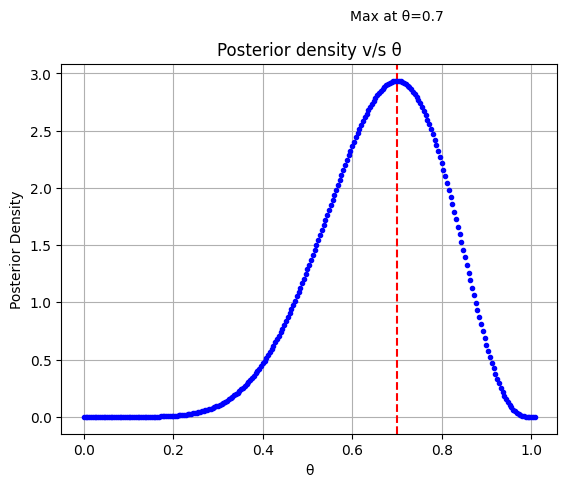

In [84]:
print("Plot for 1.2")

makePlot(x,y,"θ","Posterior Density","Posterior density v/s θ")


**Solution to 1.3:**

0.7

(Code)

In [85]:
max_x = np.round(x[np.argmax(y)],5)
print("1.3 : ", max_x)

1.3 :  0.7


**Solution for 1.4:**

Plot for 1.4


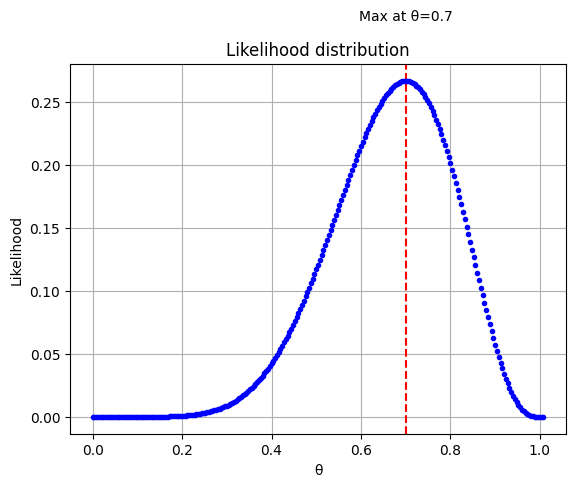

In [86]:
def lkl(x):
  return comb(10,d)*(x**d)*(1-x)**(10-d)

vector2 = np.vectorize(lkl)
z = vector2(x)

print("Plot for 1.4")

makePlot(x,z,"θ","Likelihood","Likelihood distribution")
#makePlot(x,px,"θ","p(θ)","Prior Distribution")

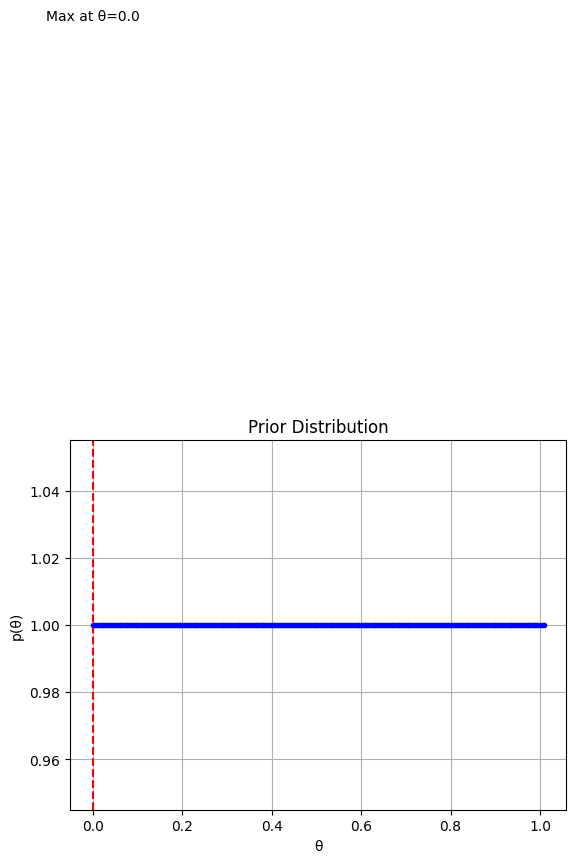

In [87]:

makePlot(x,px, "θ", "p(θ)", "Prior Distribution")

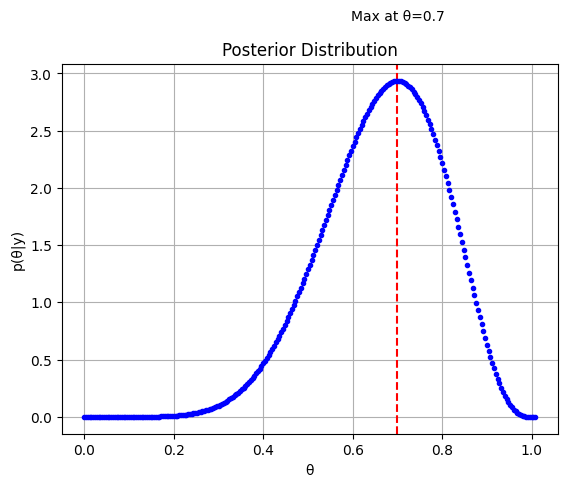

In [88]:
makePlot(x,y,"θ","p(θ|y)","Posterior Distribution")

**Part 2: A Gaussian model of reading**

**Solution to 2.1:**

In [89]:
from scipy.stats import norm


# Given data and parameters
y = np.array([300, 270, 390, 450, 500, 290, 680, 450])

# Likelihood function
def likelihood(mu, sigma):
    likelihoods = norm.pdf(y, loc=mu, scale=sigma)
    return np.prod(likelihoods)

# Prior distribution
prior_mu = norm(loc=250, scale=25)
prior_distribution = prior_mu.pdf(np.linspace(0, 700, 2000))

# Unnormalized posterior distribution
def unnormalized_posterior(mu, sigma):
    return likelihood(mu, sigma) * prior_mu.pdf(mu)

print("Unnormalized posterior for mu = 300 :",unnormalized_posterior(300,50))
print("Unnormalized posterior for mu = 900 :",unnormalized_posterior(900,50))
print("Unnormalized posterior for mu = 50  :",unnormalized_posterior(50,50))

Unnormalized posterior for mu = 300 : 6.824247957486434e-41
Unnormalized posterior for mu = 900 : 0.0
Unnormalized posterior for mu = 50  : 9.691373559300603e-138


Unnormalized posterior for mu = 300 : 6.824247957486434e-41

Unnormalized posterior for mu = 900 : 0.0

Unnormalized posterior for mu = 50 : 9.691373559300603e-138:

**Solution to 2.2:**

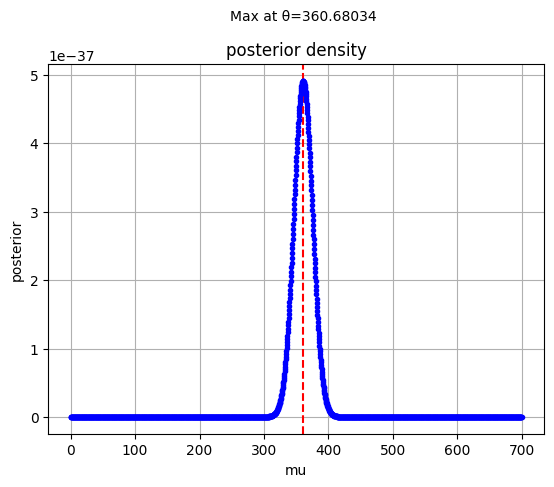

In [90]:
mu_values = np.linspace(0, 700, 2000)

# Plotting Unnormalized Posterior Distribution
posterior_values = [unnormalized_posterior(mu, 50) for mu in mu_values]
makePlot(mu_values,posterior_values,"mu","posterior","posterior density")

**Solution to 2.3:**

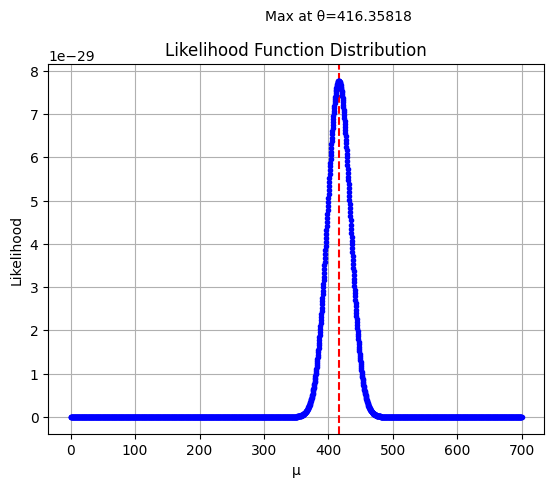

In [91]:
# Plotting Likelihood
likelihood_values = [likelihood(mu, 50) for mu in mu_values]
makePlot(mu_values,likelihood_values,"μ","Likelihood","Likelihood Function Distribution")

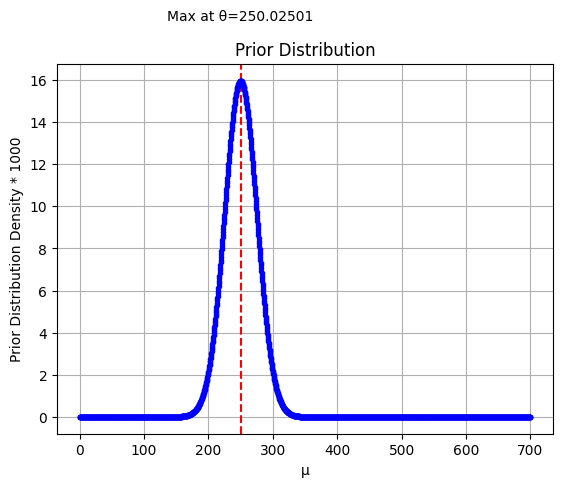

In [92]:

# Plotting Prior Distribution
makePlot(np.linspace(0, 700, 2000), prior_distribution*1000, "μ", "Prior Distribution Density * 1000", "Prior Distribution")


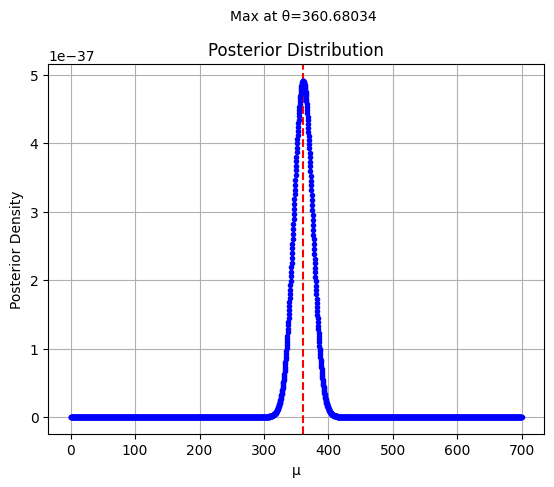

In [93]:

# Plotting Unnormalized Posterior Distribution
posterior_values = [unnormalized_posterior(mu, 50) for mu in mu_values]
makePlot(mu_values,posterior_values,"μ","Posterior Density","Posterior Distribution")

**Part 3: The Bayesian learning**




Likelihood distribution is a Poisson distribution:
The likelihood of the model is given by:
L(λ|k) = λ^k * e^-λ / k!
where k is the number of road accidents, and λ is the parameter to encode the average rate of accidents in Berlin.



It is given, that if the prior on the parameter λ is given by :
λ ∼ Gamma(40, 2)

We can derive the posterior distribution of λ analytically as :
λ ∼ Gamma(40 + k, 3)


**Solution to 3.1:**

In [94]:
data = np.array([25, 20, 23, 27])
# where k1 = 25, k2 = 20, k3 = 23, k4 = 27

#prior before day 1 : λ ∼ Gamma(40, 2)
#prior before day 2 : λ ∼ Gamma(40+k1, 2 + 1)
#prior before day 3 : λ ∼ Gamma(40+k2, 2 + 1 + 1)
#prior before day 4 : λ ∼ Gamma(40+k3, 2 + 1 + 1 + 1)
#prior before day 5 : λ ∼ Gamma(40+k4, 2 + 1 + 1 + 1 + 1)

parameter1= 40
parameter2 = 2

for i in data:
  parameter1 += i
  parameter2 += 1

print("After 4 days, Parameter 1 = ", parameter1, " and Parameter 2 = ", parameter2)

After 4 days, Parameter 1 =  135  and Parameter 2 =  6


Thus, the prior on
λ to generate predictions for day 5 is
Gamma(135,6).

**Solution to 3.2:**

To predict the number of road accidents on day 5, we use the posterior distribution of
λ, which is
Gamma(135,6), as the prior for the Poisson distribution.

The mean of a Gamma distribution
Gamma(α,β) is given by:

μ = α/β

μ = 135/6 = 22.5

The number of road accidents in a day follows a Poisson distribution with parameter
λ, which is the mean rate of accidents. Thus, the predicted number of road accidents for day 5, given
λ∼Gamma(135,6), is the expected value of
λ, which is 22.5.

**Therefore, the predicted number of road accidents on day 5 is 22 or 23.** (as number of accidents can only be integer values).

**Part 4: Model building in the Bayesian framework**

**Solution to 4.5.1:**

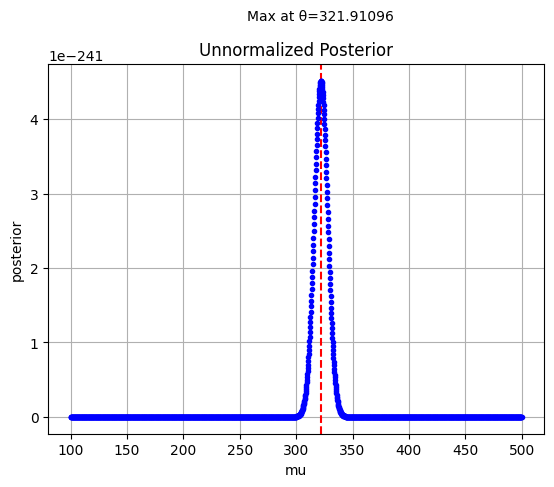

In [95]:
# Load the data
url = "https://raw.githubusercontent.com/yadavhimanshu059/CGS698C/main/notes/Module-2/recognition.csv"
data = pd.read_csv(url)
Tw = data['Tw']
Tnw = data['Tnw']

# Define the unnormalized posterior for the null hypothesis model
def unnormalized_posterior_null(mu, Tw, Tnw, sigma=60):
    L_Tw = np.prod(norm.pdf(Tw, loc=mu, scale=sigma))
    L_Tnw = np.prod(norm.pdf(Tnw, loc=mu, scale=sigma))
    p_mu = norm.pdf(mu, loc=300, scale=50)
    return L_Tw * L_Tnw * p_mu

# Generate a range of mu values
mu_values = np.linspace(100, 500, 2000)
posterior_values = [unnormalized_posterior_null(mu, Tw, Tnw) for mu in mu_values]

makePlot(mu_values, posterior_values,"mu","posterior","Unnormalized Posterior")

**Solution to 4.5.2:**

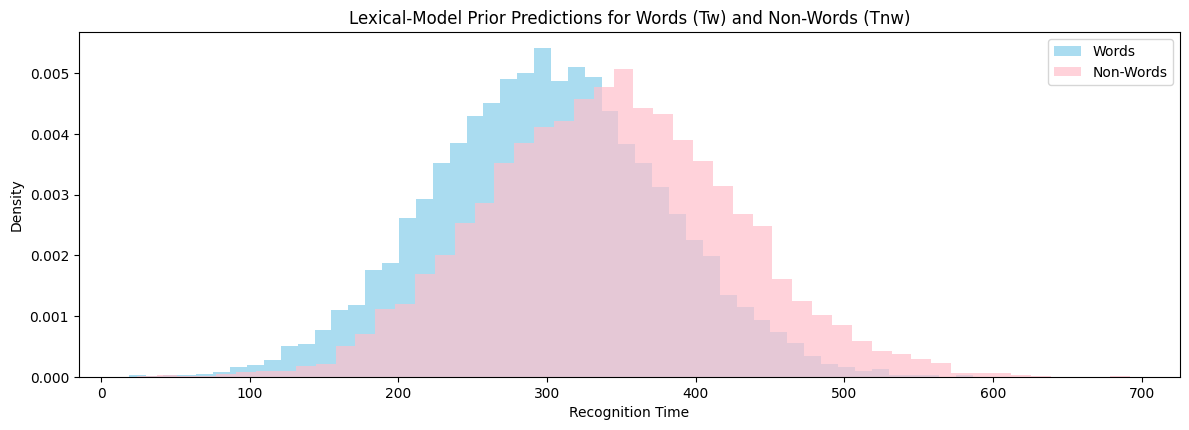

In [96]:
from scipy.stats import truncnorm

# Generate prior predictions for the lexical-access model
np.random.seed(123)
mu_prior = np.random.normal(loc=300, scale=50, size=10000)
a, b = 0, np.inf
delta_prior = truncnorm.rvs(a, b, loc=0, scale=50, size=10000)

# Generate recognition times based on the priors
Tw_prior = np.random.normal(loc=mu_prior, scale=60, size=10000)
Tnw_prior = np.random.normal(loc=mu_prior + delta_prior, scale=60, size=10000)

# Plot the prior predictions
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.hist(Tw_prior, bins=50, density=True, alpha=0.7, color='skyblue', label='Words')
plt.xlabel('Recognition Time')
plt.ylabel('Density')

plt.subplot(2, 1, 1)
plt.hist(Tnw_prior, bins=50, density=True, alpha=0.7, color='pink', label='Non-Words')
plt.title('Lexical-Model Prior Predictions for Words (Tw) and Non-Words (Tnw)')
plt.xlabel('Recognition Time')
plt.ylabel('Density')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

**Solution to 4.5.3:**



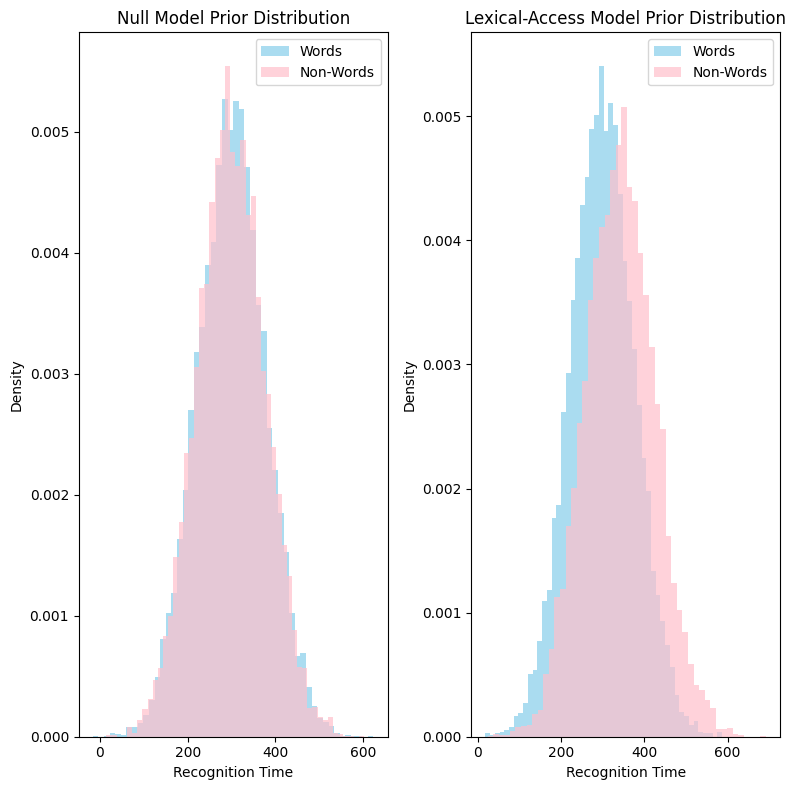

In [97]:
# Generate prior predictions for the null hypothesis model
mu_prior_null = np.random.normal(loc=300, scale=50, size=10000)
Tw_prior_null = np.random.normal(loc=mu_prior_null, scale=60, size=10000)
Tnw_prior_null = np.random.normal(loc=mu_prior_null, scale=60, size=10000)


plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.hist(Tw_prior_null, bins=50, density=True, alpha=0.7, color='skyblue', label='Words')
plt.subplot(1, 2, 1)
plt.hist(Tnw_prior_null, bins=50, density=True, alpha=0.7, color='pink', label='Non-Words')
plt.title('Null Model Prior Distribution')
plt.xlabel('Recognition Time')
plt.ylabel('Density')
plt.legend(loc="upper right")

plt.subplot(1, 2, 2)
plt.hist(Tw_prior, bins=50, density=True, alpha=0.7, color='skyblue', label='Words')
plt.subplot(1, 2, 2)
plt.hist(Tnw_prior, bins=50, density=True, alpha=0.7, color='pink', label='Non-Words')
plt.title('Lexical-Access Model Prior Distribution')
plt.xlabel('Recognition Time')
plt.ylabel('Density')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()


In the Null Model, prior distributions of reaction times to words and non-words is extremely similar. However, in the Lexical-Access Model, there is, on average, a slightly longer reaction time for Non-Words as compared to Words. ( The entire distribution seems to be shifted to the right).

**Solution to 4.5.4:**

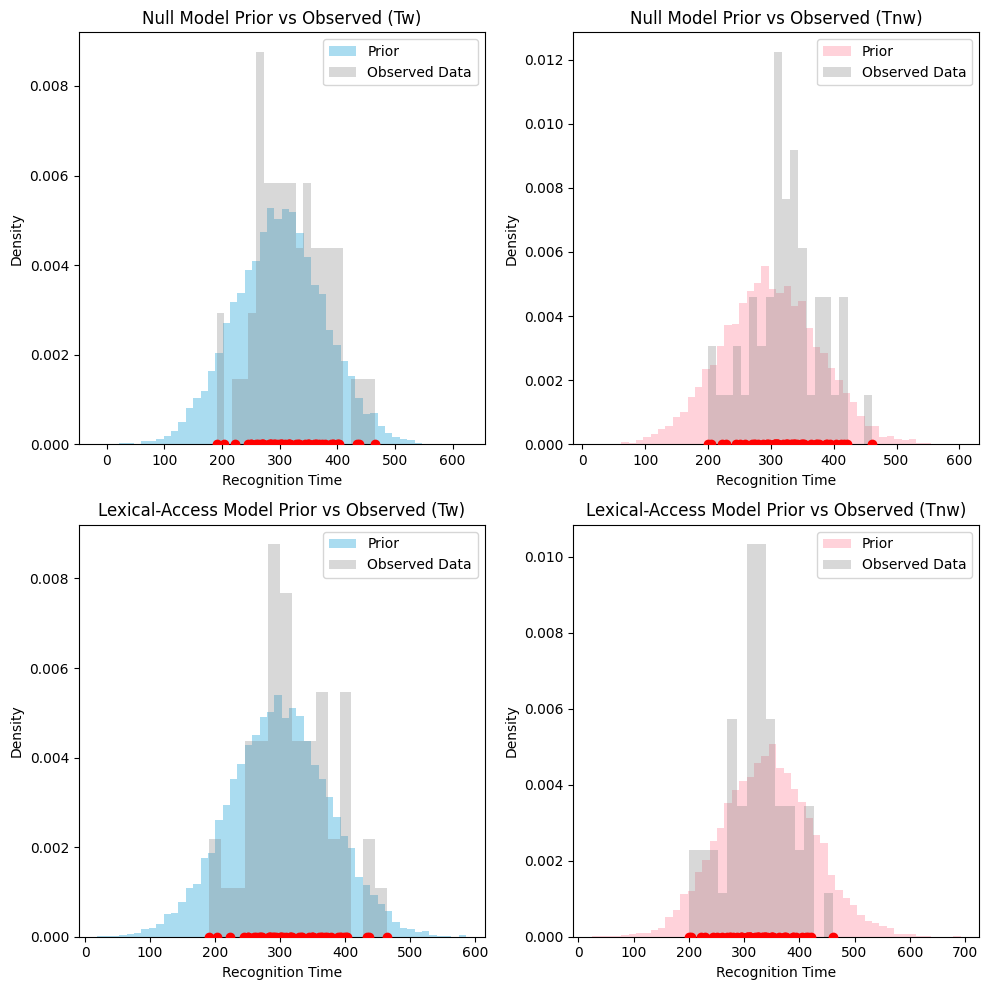

In [98]:


# Plot the observed data over the prior predictions
plt.figure(figsize=(10, 10))

# Null model
plt.subplot(2, 2, 1)
plt.hist(Tw_prior_null, bins=50, density=True, alpha=0.7, color='skyblue', label='Prior')
plt.hist(Tw, bins=20, density=True ,alpha=0.3, color = 'gray', label='Observed Data' )

plt.scatter(Tw, np.zeros_like(Tw), color='red', zorder=10)
plt.title('Null Model Prior vs Observed (Tw)')
plt.xlabel('Recognition Time')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(Tnw_prior_null, bins=50, density=True, alpha=0.7, color='pink', label='Prior')
plt.scatter(Tnw, np.zeros_like(Tnw), color='red', zorder=10)
plt.hist(Tnw, bins=20, density=True ,alpha=0.3, color = 'gray', label='Observed Data' )

plt.title('Null Model Prior vs Observed (Tnw)')
plt.xlabel('Recognition Time')
plt.ylabel('Density')
plt.legend()

# Lexical-access model
plt.subplot(2, 2, 3)
plt.hist(Tw_prior, bins=50, density=True, alpha=0.7, color='skyblue', label='Prior')
plt.hist(Tw, bins=15, density=True ,alpha=0.3, color = 'gray', label='Observed Data' )
plt.scatter(Tw, np.zeros_like(Tw), color='red', zorder=10)

plt.title('Lexical-Access Model Prior vs Observed (Tw)')
plt.xlabel('Recognition Time')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(Tnw_prior, bins=50, density=True, alpha=0.7, color='pink', label='Prior')
plt.scatter(Tnw, np.zeros_like(Tnw), color='red', zorder=10)
plt.hist(Tnw, bins=15, density=True ,alpha=0.3, color = 'gray', label='Observed Data' )

plt.title('Lexical-Access Model Prior vs Observed (Tnw)')
plt.xlabel('Recognition Time')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


Both the models give a very similar distribution for the reaction time for true words, as such, they both work well with the given data.

As for non-words, the lexical-access model fits the data better as compared to the null model. The null model seems to predict faster reaction times than the actual data, while lexical-access model aligns with the data better.

Therefore, the lexical-access model is more consistent with the data.

**Solution to 4.5.5:**

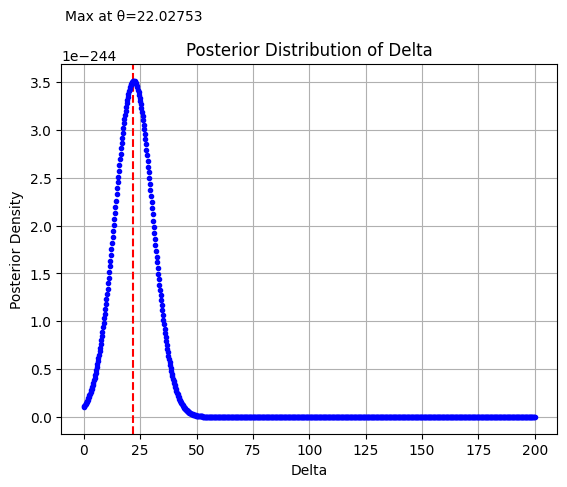

In [99]:
# Define the unnormalized posterior for the lexical-access model
def unnormalized_posterior_lexical(delta, mu, Tw, Tnw, sigma=60):
    L_Tw = np.prod(norm.pdf(Tw, loc=mu, scale=sigma))
    L_Tnw = np.prod(norm.pdf(Tnw, loc=mu + delta, scale=sigma))
    p_mu = norm.pdf(mu, loc=300, scale=50)
    p_delta = truncnorm.pdf(delta, a=0, b=np.inf, loc=0, scale=50)
    return L_Tw * L_Tnw * p_mu * p_delta


delta_values = np.linspace(0, 200, 800)
mu_value = np.mean(mu_prior)
posterior_delta_values = [unnormalized_posterior_lexical(delta, mu_value, Tw, Tnw) for delta in delta_values]

makePlot(delta_values,posterior_delta_values,"Delta","Posterior Density","Posterior Distribution of Delta")

